# Neural Networks as Dynamical Systems

![feedforward](Single_layer_ann.png)
A neuronal model is made up of an input vector $\overrightarrow{X}=(x_1,x_2,\ldots, x_n)^T$, A vector of synaptic weights, $W_k=w_{kj}$, $j=1,2,\ldots,n$ a bias $b_k$ and an output $y_k$.

The neuron itself is a nonlinear transfer function $\phi$.

\begin{align}
v_k &= W_k X + b_k\\
y_k &= \phi(v_k).
\end{align}

The function $\phi$, also known as the activation function, typically range from $-1$ to $+1$ and can take many forms such as the Heaviside function, piece-wise linear function, a sigmoid function, etc.

# Training
training a neural network corresponds to the act of adjusting the parameters described above to minimize the error of the network with respect to a target vector.

## Generalized Delta rule
for a linear activation function, the weights are adjusted according to:

$$w_{kj}(n+1)=w_{kj}(n)-\eta g_{kj},$$

where n is the number of iterations, $g_{kj}=-(t_k-y_k)$, and $\eta$ is a small positive constant called the learning rate.

For a nonlinear activation function, the generalized delta rule is:

$$w_{kj}(n+1)=w_{kj}(n)-\eta g_{kj},$$

where

$$g_{kj}=(y_k-t_k)\frac{\partial \phi}{\partial v_k}x_j$$

In [14]:
np.c_[np.ones(rows), X].shape

(506, 5)

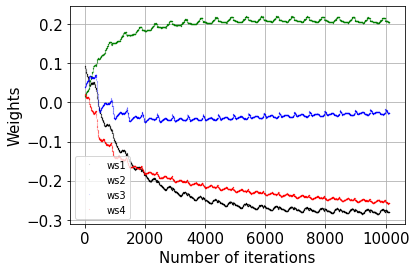

In [8]:
import matplotlib.pyplot as plt
import numpy as np

data = np.loadtxt('housing.txt')
rows, columns = data.shape
columns = 4  # Using 4 columns from data in this case

X = data[:, [5, 8, 12]]
t = data[:, 13]
ws1, ws2, ws3, ws4 = [], [], [], []
k = 0

# Scale the data to zero mean and unit variance
xmean = X.mean(axis=0)
xstd = X.std(axis=0)
ones = np.ones((1,rows))
X = (X - xmean * ones.T) / (xstd * ones.T)
X = np.c_[np.ones(rows), X]

tmean = (max(t) + min(t)) / 2
tstd = (max(t) - min(t)) / 2
t = (t - tmean) / tstd

w = 0.1 * np.random.random(columns)
y1 = np.tanh(X.dot(w))
e1 = t - y1
mse = np.var(e1)

num_epochs = 20  # number of iterations
eta = 0.001 # Learning rate
k = 1
erros = [e1.mean()]
for m in range(num_epochs):
    for n in range(rows):
        yk = np.tanh(X[n, :].dot(w))
        err = yk - t[n]
        g = X[n, :].T * ((1 - yk**2) * err)
        w = w - eta*g
        k += 1
        ws1.append([k, np.array(w[0]).tolist()])
        ws2.append([k, np.array(w[1]).tolist()])
        ws3.append([k, np.array(w[2]).tolist()])
        ws4.append([k, np.array(w[3]).tolist()])
#         print(err.mean())
        erros.append(err.mean())
#         break
# print(erros)
ws1 = np.array(ws1)
ws2 = np.array(ws2)
ws3 = np.array(ws3)
ws4 = np.array(ws4)

plt.plot(ws1[:, 0], ws1[:, 1], 'k.', markersize=0.1, label='ws1')
plt.plot(ws2[:, 0], ws2[:, 1], 'g.', markersize=0.1, label='ws2')
plt.plot(ws3[:, 0], ws3[:, 1], 'b.', markersize=0.1, label='ws3')
plt.plot(ws4[:, 0], ws4[:, 1], 'r.', markersize=0.1, label='ws4')
# plt.plot(erros, label='erro')
plt.xlabel('Number of iterations', fontsize=15)
plt.ylabel('Weights', fontsize=15)
plt.tick_params(labelsize=15)
plt.grid()
plt.legend()
plt.show()

## Backpropagation
Backpropagation is the most common training algorithm in use. It's required to train neurons in a *hidden* layer.

In [9]:
%%html
<div style='position:relative; padding-bottom:calc(56.25% + 44px)'><iframe src='https://gfycat.com/ifr/AdolescentIdioticGoldeneye' frameborder='0' scrolling='no' width='100%' height='100%' style='position:absolute;top:0;left:0;' allowfullscreen></iframe></div><p> <a href="https://gfycat.com/adolescentidioticgoldeneye">via Gfycat</a></p>

### Algorithm
**Definitions:**

Partial derivatives:
$$\frac{\partial E_d}{\partial w_{ij}^k} = \delta_j^k o_i^{k-1}.\label{eq:1}$$

Final layer's error: 
$$\delta_1^m = g_o^{\prime}(a_1^m)\left(\hat{y_d}-y_d\right).\label{eq:2}$$

Hidden layer's error:
$$\delta_j^k = g^{\prime}\big(a_j^k\big)\sum_{l=1}^{r^{k+1}}w_{jl}^{k+1}\delta_l^{k+1}.\label{eq:3}$$

Combining the partial derivatives for each input-output pair,
$$\frac{\partial E(X, \theta)}{\partial w_{ij}^k} = \frac{1}{N}\sum_{d=1}^N\frac{\partial}{\partial w_{ij}^k}\left(\frac{1}{2}\left(\hat{y_d} - y_d\right)^{2}\right) = \frac{1}{N}\sum_{d=1}^N\frac{\partial E_d}{\partial w_{ij}^k}.\label{eq:4}$$

Weight update:
$$\Delta w_{ij}^k = - \alpha \frac{\partial E(X, \theta)}{\partial w_{ij}^k}.\label{eq:5}$$


 1. Calculate the forward phase for each input-output pair $(\vec{x_d}, y_d)$ and store the results $\hat{y_d}$, $a_j^k$, and $o_j^k$ for each node $j$ in layer $k$ by proceeding from layer $0$, the input layer, to layer $m$, the output layer.

 1. Calculate the backward phase for each input-output pair $(\vec{x_d}, y_d)$ and store the results $\frac{\partial E_d}{\partial w_{ij}^k}$ for each weight $w_{ij}^k$ connecting node $i$ in layer $k-1$ to node $j$ in layer $k$ by proceeding from layer $m$, the output layer, to layer $1$, the input layer.

    - Evaluate the error term for the final layer $\delta_1^m$ by using equation (\ref{eq:2}).
    - Backpropagate the error terms for the hidden layers $\delta_j^k$, working backwards from the final hidden layer $k = m-1$, by repeatedly using equation (\ref{eq:3}).
    - Evaluate the partial derivatives of the individual error $E_d$ with respect to $w_{ij}^k$ by using  equation (\ref{eq:1}).

 1. Combine the individual gradients for each input-output pair $\frac{\partial E_d}{\partial w_{ij}^k}$ to get the total gradient $\frac{\partial E(X, \theta)}{\partial w_{ij}^k}$ for the entire set of input-output pairs $X = \big\{(\vec{x_1}, y_1), \dots, (\vec{x_N}, y_N) \big\}$ by using equation (\ref{eq:4}) (a simple average of the individual gradients).

 1. Update the weights according to the learning rate α\alpha and total gradient $\frac{\partial E(X, \theta)}{\partial w_{ij}^k}$ by using equation (\ref{eq:5}) (moving in the direction of the negative gradient). 

In the example below, the matrix $X$ is the set of inputs $\vec{x}$ and the matrix y is the set of outputs $y$. The number of nodes in the hidden layer can be customized by setting the value of the variable `num_hidden`. The learning rate $\alpha$ is controlled by the variable `alpha`. The number of iterations of gradient descent is controlled by the variable `num_iterations`.

By changing these variables and comparing the output of the program to the target values $y$, one can see how these variables control how well backpropagation can learn the dataset $X$ and y. For example, more nodes in the hidden layer and more iterations of gradient descent will generally improve the fit to the training dataset. However, using too large or too small a learning rate can cause the model to diverge or converge too slowly, respectively.
Adapted from: `Backpropagation. Brilliant.org`. Retrieved 08:32, August 31, 2021, from https://brilliant.org/wiki/backpropagation/

Output After Training: 
[[2.11135662e-04]
 [9.99525588e-01]
 [1.66889680e-04]
 [9.99576185e-01]
 [9.99362960e-01]
 [1.30185107e-03]]


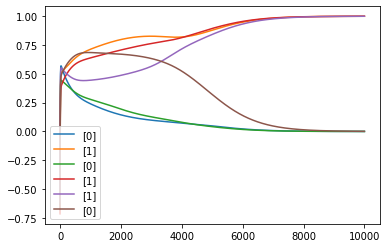

In [15]:
import numpy as np

# define the sigmoid function
def sigmoid(x, derivative=False):

    if (derivative == True):
        return sigmoid(x,derivative=False) * (1 - sigmoid(x,derivative=False))
    else:
        return 1 / (1 + np.exp(-x))

# choose a random seed for reproducible results
np.random.seed(1)

# learning rate
alpha = .1

# number of nodes in the hidden layer
num_hidden = 3

# inputs
X = np.array([  
    [0, 0, 1],
    [0, 1, 1],
    [1, 0, 0],
    [1, 1, 0],
    [1, 0, 1],
    [1, 1, 1],
])

# outputs
# x.T is the transpose of x, making this a column vector
y = np.array([[0, 1, 0, 1, 1, 0]]).T

# initialize weights randomly with mean 0 and range [-1, 1]
# the +1 in the 1st dimension of the weight matrices is for the bias weight
hidden_weights = 2*np.random.random((X.shape[1] + 1, num_hidden)) - 1
output_weights = 2*np.random.random((num_hidden + 1, y.shape[1])) - 1

# number of iterations of gradient descent
num_iterations = 10000
outputs=[]
# for each iteration of gradient descent
for i in range(num_iterations):

    # forward phase
    # np.hstack((np.ones(...), X) adds a fixed input of 1 for the bias weight
    input_layer_outputs = np.hstack((np.ones((X.shape[0], 1)), X))
    hidden_layer_outputs = np.hstack((np.ones((X.shape[0], 1)), sigmoid(np.dot(input_layer_outputs, hidden_weights))))
    output_layer_outputs = np.dot(hidden_layer_outputs, output_weights)

    # backward phase
    # output layer error term
    output_error = output_layer_outputs - y
    # hidden layer error term
    # [:, 1:] removes the bias term from the backpropagation
    hidden_error = hidden_layer_outputs[:, 1:] * (1 - hidden_layer_outputs[:, 1:]) * np.dot(output_error, output_weights.T[:, 1:])

    # partial derivatives
    hidden_pd = input_layer_outputs[:, :, np.newaxis] * hidden_error[: , np.newaxis, :]
    output_pd = hidden_layer_outputs[:, :, np.newaxis] * output_error[:, np.newaxis, :]

    # average for total gradients
    total_hidden_gradient = np.average(hidden_pd, axis=0)
    total_output_gradient = np.average(output_pd, axis=0)

    # update weights
    hidden_weights += - alpha * total_hidden_gradient
    output_weights += - alpha * total_output_gradient
    outputs.append(output_layer_outputs)

# print the final outputs of the neural network on the inputs X
print("Output After Training: \n{}".format(output_layer_outputs))
plt.plot(np.hstack(outputs).T);
plt.legend([str(i) for i in y]);

In [16]:
from scipy.integrate import odeint

## Continuous Hopfield Model
Hopfield equation where derived from Kirchoff's laws for electrical circuits.

$$\frac{d\overrightarrow{x}(t)}{dt}=-x(t) +Wa(t) +b$$

where x(t) is a vector of neuron activation levels, $W$ is the weigth matrix, b are the biases, and $a(t)=\phi(x(t))$. 

### Two neuron example
\begin{align}
\dot{x}&=-x +\frac{2}{\pi}tan^{-1}\left(\frac{\gamma\pi y}{2}\right)\\
\dot{y}&=-y +\frac{2}{\pi}tan^{-1}\left(\frac{\gamma\pi x}{2}\right)
\end{align}

let

\begin{equation}
\nonumber
W=\begin{bmatrix}
0 & 1 \\
1 & 0 \\
\end{bmatrix},
b=\begin{bmatrix}
0\\
0
\end{bmatrix}, a1=2/\pi tan^{-1}
\end{equation}



In [28]:
def hop2(Y,t):
    x,y = Y
    gamma = 20.5
    return -x+(2/np.pi)*np.arctan(gamma*np.pi*y/2), -y+(2/np.pi)*np.arctan(gamma*np.pi*x/2)

In [29]:
res = odeint(hop2,[0.5,0.5], range(100))

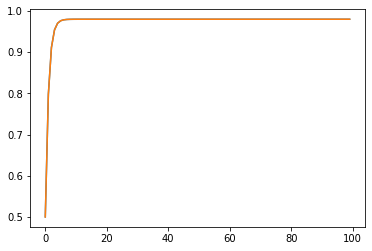

In [30]:
plt.plot(res);

## Discrete Hopfield Model

In [42]:
from sympy import Matrix, eye
import random

# The fundamental memories:
x1 = [1, 1, 1, 1, 1]
x2 = [1, -1, -1, 1, -1]
x3 = [-1, 1, -1, 1, 1]

X = Matrix([x1, x2, x3])
W = X.T * X / 5 - 3*eye(5) / 5

def hsgn(v, x):
    if v > 0:
        return 1
    elif v == 0:
        return x
    else:
        return -1

L = [0, 1, 2, 3, 4]
n = random.sample(L, len(L))

xinput = [1, -1, -1, 1, 1]
xtest = xinput
for j in range(4):
    M = W.row(n[j]) * Matrix(xtest)
    xtest[n[j]] = hsgn(M[0], xtest[n[j]])

if xtest == x1:
    print('Net has converged to X1')
elif xtest == x2:
    print('Net has converged to X2')
elif xtest == x3:
    print('Net has converged to X3')
else:
    print('Iterate again: May have converged to spurious state')

Net has converged to X2


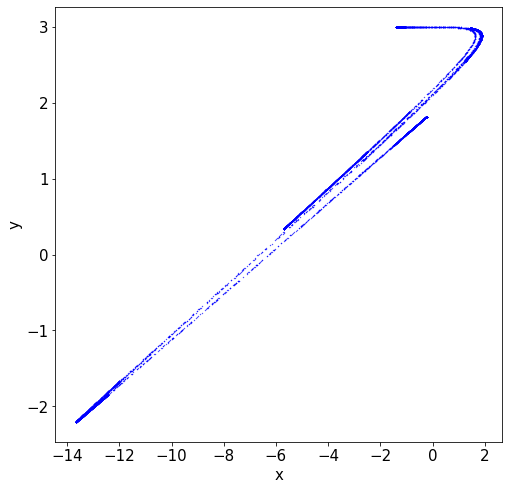

In [43]:
# Program 20c: Iteration of the minimal chaotic neuromodule.
# See Figure 20.13.

import matplotlib.pyplot as plt
import numpy as np

# Parameters
b1, b2, w11, w21, w12, a = -2, 3, -20, -6, 6, 1
num_iterations = 10000

def neuromodule(X):
    x,y=X
    xn=b1+w11/(1+np.exp(-a*x))+w12/(1+np.exp(-a*y))
    yn=b2+w21/(1+np.exp(-a*x))
    return xn,yn

X0 = [0, 2]
X, Y = [], []

for i in range(num_iterations):
    xn, yn = neuromodule(X0)
    X, Y = X + [xn], Y + [yn]
    X0 = [xn, yn]

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(X, Y, color='blue', s=0.1)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.tick_params(labelsize=15)
plt.show()


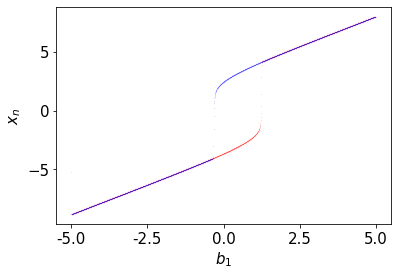

In [44]:
# Program 20d: Bifurcation diagram of the neuromodule.
# See Figure 20.16.

from matplotlib import pyplot as plt
import numpy as np

# Parameters
b2, w11, w21, w12, a = 3, 7, 5, -4, 1
start, max = -5, 10
half_N = 1999
N = 2 * half_N + 1
N1 = 1 + half_N
xs_up, xs_down = [], []
x, y = -10, -3
ns_up = np.arange(half_N)
ns_down = np.arange(N1, N)

# Ramp b1 up
for n in ns_up:
    b1 = start + n*max / half_N
    x = b1 + w11 / (1 + np.exp(-a*x)) + w12 / (1 + np.exp(-a*y))
    y = b2+w21 / (1 + np.exp(-a*x))
    xn = x
    xs_up.append([n, xn])
xs_up = np.array(xs_up)

# Ramp b1 down
for n in ns_down:
    b1 = start + 2*max - n*max / half_N
    x = b1 + w11 / (1 + np.exp(-a*x)) + w12 / (1 + np.exp(-a*y))
    y = b2 + w21 / (1 + np.exp(-a*x))
    xn = x
    xs_down.append([N-n, xn])
xs_down = np.array(xs_down)

fig, ax = plt.subplots()
xtick_labels = np.linspace(start, max, 7)
ax.set_xticks([(-start + x) / max * N1 for x in xtick_labels])
ax.set_xticklabels(['{:.1f}'.format(xtick) for xtick in xtick_labels])

plt.plot(xs_up[:, 0], xs_up[:, 1], 'r.', markersize=0.1)
plt.plot(xs_down[:, 0], xs_down[:,1], 'b.', markersize=0.1)
plt.xlabel(r'$b_1$', fontsize=15)
plt.ylabel(r'$x_n$', fontsize=15)
plt.tick_params(labelsize=15)
plt.show()
